<a href="https://colab.research.google.com/github/daianekr/kaggle-challenge/blob/main/nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## House Prices Prediction


**Introdução:** a competição do kaggle trata sobre o uso de variáveis explicativas que descreve vários aspectos de casas resisdenciais em Ames, Iowa, e que nos desafia a prever o preço final de cada casa.

O conjunto de dados nomeado de *Ames Housing Dataset* foi construído por Dean de Cock para o ensino de Ciência de Dados.

**Objetivo:** trabalhar para prver o preço de venda de cada casa. Para cada ID no conjunto de teste, devemos prever o valor da variável ***SalePrice*** do conjunto de teste.

**Métrica:** a avaliação dos envios é feita pela *RMSE (Root-Mean-Squared-Error)*, medindo o logaritmo do valor previsto e o logaritmo do preço de venda real da amostra. Fazer isso significa que erros na previsão de casas caras ou baratas efetarão o resultado igualmente.

**Formato do arquivo de submissão:** o arquivo deve conter um cabeçalho e ter o seguinte formato:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.

```



## Importando as Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import datetime

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV, Lasso
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor
import lightgbm as lgbm

import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Lendo o arquivo de treino e teste disponibilizados:


Visualizando as primeiras linhas do arquivo:


In [2]:
treino = pd.read_csv('/content/train.csv')
treino.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
teste = pd.read_csv('/content/test.csv')
teste.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [4]:
# selecionando a variável target:

y = treino.SalePrice

In [5]:
# excluindo a variável target do conj. de dados de treino

x = treino.drop(['SalePrice'], axis=1)

In [6]:
x.shape

(1460, 80)

In [62]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

## Investigando colunas com valores faltando:

In [50]:
count_by_column = x.isnull().sum()
percent_by_column = (count_by_column / x.shape[0]) * 100
percent_by_column[percent_by_column > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Podemos notar no resultado acima, a porcentagem de valores nulos em cada coluna. Existem técnicas para lidar com o problema de dados faltantes, mas o fato é que casos em que faltam dados em mais de 70% da coluna, implica em remoção da mesma pois há pouco informação útil restante em seu conteúdo. Nesse caso, o que acontece para as colunas **PoolQC** = Qualidade da piscina, **MiscFeature** = Recurso diverso não coberto em outras categorias, **Alley** = Tipo de acesso ao beco e **Fence** = Qualidade da cerca.



Para as colunas **MasVnrType** = Tipo de revestimento de alvenaria, **FireplaceQu** = Qualidade da lareira e **LotFrontage** = Metros lineares de rua conectados à propriedade, vamos estudar seus conteúdos para saber se vale a pena seguir com alguma técnica de imputação de dados ou a exclusão da coluna do conjunto de dados.

In [51]:
x['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [52]:
x['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

**Para as duas variáveis categóricas mostradas acima:**

no primeiro caso, **MasVnrType** (tipo de revestimento de alvenaria), variável categórica com mais de 50% de dados faltantes. Se tentarmos imputar dados com base nos dados existentes, tenderíamos a imputar dados com base no valor que mais aperece (moda), o que introduziria viés, causando distorção nos dados.

a baixa densidade de dados nessas colunas pode introduzir ruído no modelo, e  o custo de tentar imputar ou manter essas variáveis seria maior do que o benefício esperado. Além disso, a ideia é fazer uma **regressão**, variáveis com alta quantidade de nulos e baixa relevância explicativa tendem a prejudicar o desempenho.

In [53]:
x['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [28]:
teste.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive


* **SalePrice**: preço de venda da propriedade em dólares. Esta é a variável alvo que você está tentando prever.
* **MSSubClass**: Classe do edifício.
* **MSZoning**: Classificação geral de zoneamento.
* **LotFrontage**: Metros lineares de rua conectados à propriedade.
* **LotArea**: Tamanho do lote em pés quadrados.
* **Street**: Tipo de acesso por estrada.
* **Alley**: Tipo de acesso por viela.
* **LotShape**: Formato geral da propriedade.
* **LandContour**: Nivelamento da propriedade.
* **Utilities**: Tipo de utilidades disponíveis.
* **LotConfig**: Configuração do lote.
* **LandSlope**: Inclinação da propriedade.
* **Neighborhood**: Localização física dentro dos limites da cidade de Ames.
* **Condition1**: Proximidade com estrada principal ou ferrovia.
* **Condition2**: Proximidade com estrada principal ou ferrovia (se houver uma segunda).
* **BldgType**: Tipo de habitação.
* **HouseStyle**: Estilo da habitação.
* **OverallQual**: Qualidade geral dos materiais e acabamentos.
* **OverallCond**: Avaliação da condição geral.
* **YearBuilt**: Data de construção original.
* **YearRemodAdd**: Data da reforma.
* **RoofStyle**: Tipo de telhado.
* **RoofMatl**: Material do telhado.
* **Exterior1st**: Revestimento exterior da casa.
* **Exterior2nd**: Revestimento exterior da casa (se houver mais de um material).
* **MasVnrType**: Tipo de revestimento em alvenaria.
* **MasVnrArea**: Área de revestimento em alvenaria em pés quadrados.
* **ExterQual**: Qualidade do material exterior.
* **ExterCond**: Condição atual do material exterior.
* **Foundation**: Tipo de fundação.
* **BsmtQual**: Altura do porão.
* **BsmtCond**: Condição geral do porão.
* **BsmtExposure**: Paredes do porão com saída para o exterior ou nível de jardim.
* **BsmtFinType1**: Qualidade da área acabada do porão.
* **BsmtFinSF1**: Área acabada do tipo 1 em pés quadrados.
* **BsmtFinType2**: Qualidade da segunda área acabada (se presente).
* **BsmtFinSF2**: Área acabada do tipo 2 em pés quadrados.
* **BsmtUnfSF**: Área inacabada do porão em pés quadrados.
* **TotalBsmtSF**: Área total do porão em pés quadrados.
* **Heating**: Tipo de aquecimento.
* **HeatingQC**: Qualidade e condição do aquecimento.
* **CentralAir**: Ar-condicionado central.
* **Electrical**: Sistema elétrico.
* **1stFlrSF**: Área do primeiro andar em pés quadrados.
* **2ndFlrSF**: Área do segundo andar em pés quadrados.
* **LowQualFinSF**: Área acabada de baixa qualidade (todos os andares) em pés quadrados.
* **GrLivArea**: Área útil acima do nível do solo em pés quadrados.
* **BsmtFullBath**: Banheiros completos no porão.
* **BsmtHalfBath**: Lavabos no porão.
* **FullBath**: Banheiros completos acima do nível do solo.
* **HalfBath**: Lavabos acima do nível do solo.
* **Bedroom**: Número de quartos acima do nível do porão.
* **Kitchen**: Número de cozinhas.
* **KitchenQual**: Qualidade da cozinha.
* **TotRmsAbvGrd**: Total de cômodos acima do nível do solo (não inclui banheiros).
* **Functional**: Avaliação da funcionalidade da casa.
* **Fireplaces**: Número de lareiras.
* **FireplaceQu**: Qualidade da lareira.
* **GarageType**: Localização da garagem.
* **GarageYrBlt**: Ano de construção da garagem.
* **GarageFinish**: Acabamento interior da garagem.
* **GarageCars**: Capacidade da garagem em número de carros.
* **GarageArea**: Tamanho da garagem em pés quadrados.
* **GarageQual**: Qualidade da garagem.
* **GarageCond**: Condição da garagem.
* **PavedDrive**: Entrada pavimentada para carros.
* **WoodDeckSF**: Área de deck de madeira em pés quadrados.
* **OpenPorchSF**: Área de varanda aberta em pés quadrados.
* **EnclosedPorch**: Área de varanda fechada em pés quadrados.
* **3SsnPorch**: Área de varanda para três estações em pés quadrados.
* **ScreenPorch**: Área de varanda com tela em pés quadrados.
* **PoolArea**: Área da piscina em pés quadrados.
* **PoolQC**: Qualidade da piscina.
* **Fence**: Qualidade da cerca.
* **MiscFeature**: Característica adicional não coberta em outras categorias.
* **MiscVal**: Valor em dólares da característica adicional.
* **MoSold**: Mês da venda.
* **YrSold**: Ano da venda.
* **SaleType**: Tipo de venda.
* **SaleCondition**: Condição da venda.



In [54]:
# removendo a coluna de identificação (Id)

x.drop('Id', axis=1, inplace=True)
teste.drop('Id', axis=1, inplace=True)

In [55]:
x['HasFireplace'] = x['FireplaceQu'].notnull().astype(int)

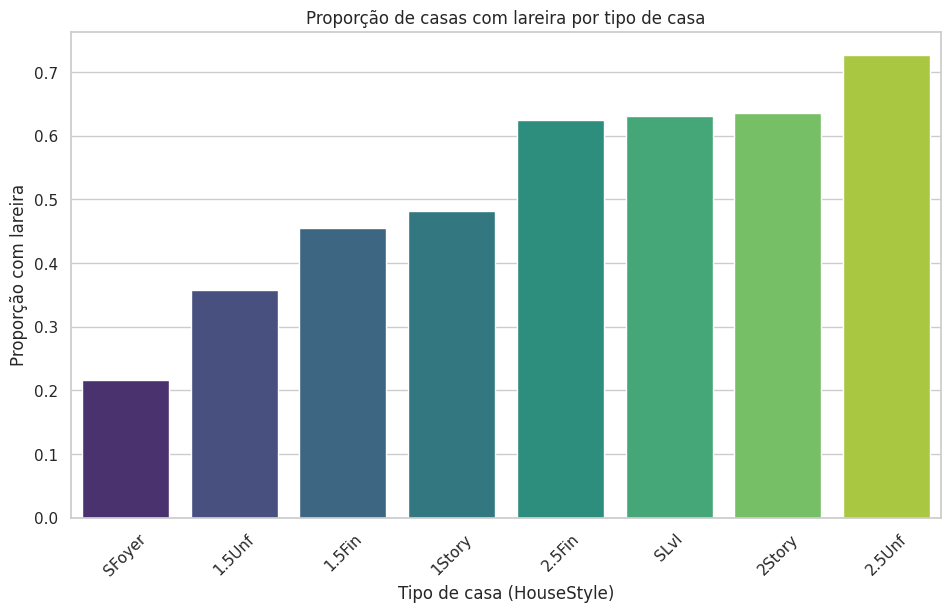

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

fireplace_by_housestyle = x.groupby('HouseStyle')['HasFireplace'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=fireplace_by_housestyle.index, y=fireplace_by_housestyle.values, palette='viridis')
plt.title('Proporção de casas com lareira por tipo de casa')
plt.xlabel('Tipo de casa (HouseStyle)')
plt.ylabel('Proporção com lareira')
plt.xticks(rotation=45)
plt.show()

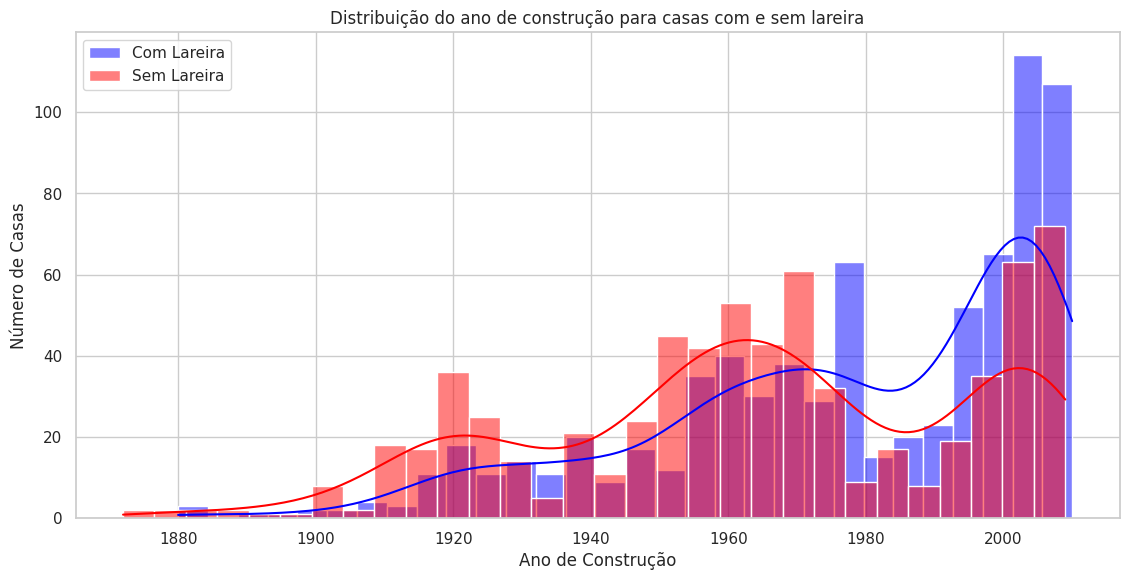

In [57]:
plt.figure(figsize=(12, 6))

sns.histplot(x[x['HasFireplace'] == 1]['YearBuilt'], bins=30, color='blue', label='Com Lareira', kde=True)

sns.histplot(x[x['HasFireplace'] == 0]['YearBuilt'], bins=30, color='red', label='Sem Lareira', kde=True)

plt.title('Distribuição do ano de construção para casas com e sem lareira')
plt.xlabel('Ano de Construção')
plt.ylabel('Número de Casas')
plt.legend()
plt.show()


In [58]:
import pandas as pd

moda_fireplace_por_house_style = x.groupby('HouseStyle')['FireplaceQu'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

def imputar_fireplace(row):
    if pd.isnull(row['FireplaceQu']):
        return moda_fireplace_por_house_style[row['HouseStyle']]
    else:
        return row['FireplaceQu']

x['FireplaceQu'] = x.apply(imputar_fireplace, axis=1)

print(x['FireplaceQu'].isnull().sum())  # deve retornar 0 se todos os valores foram imputados


0


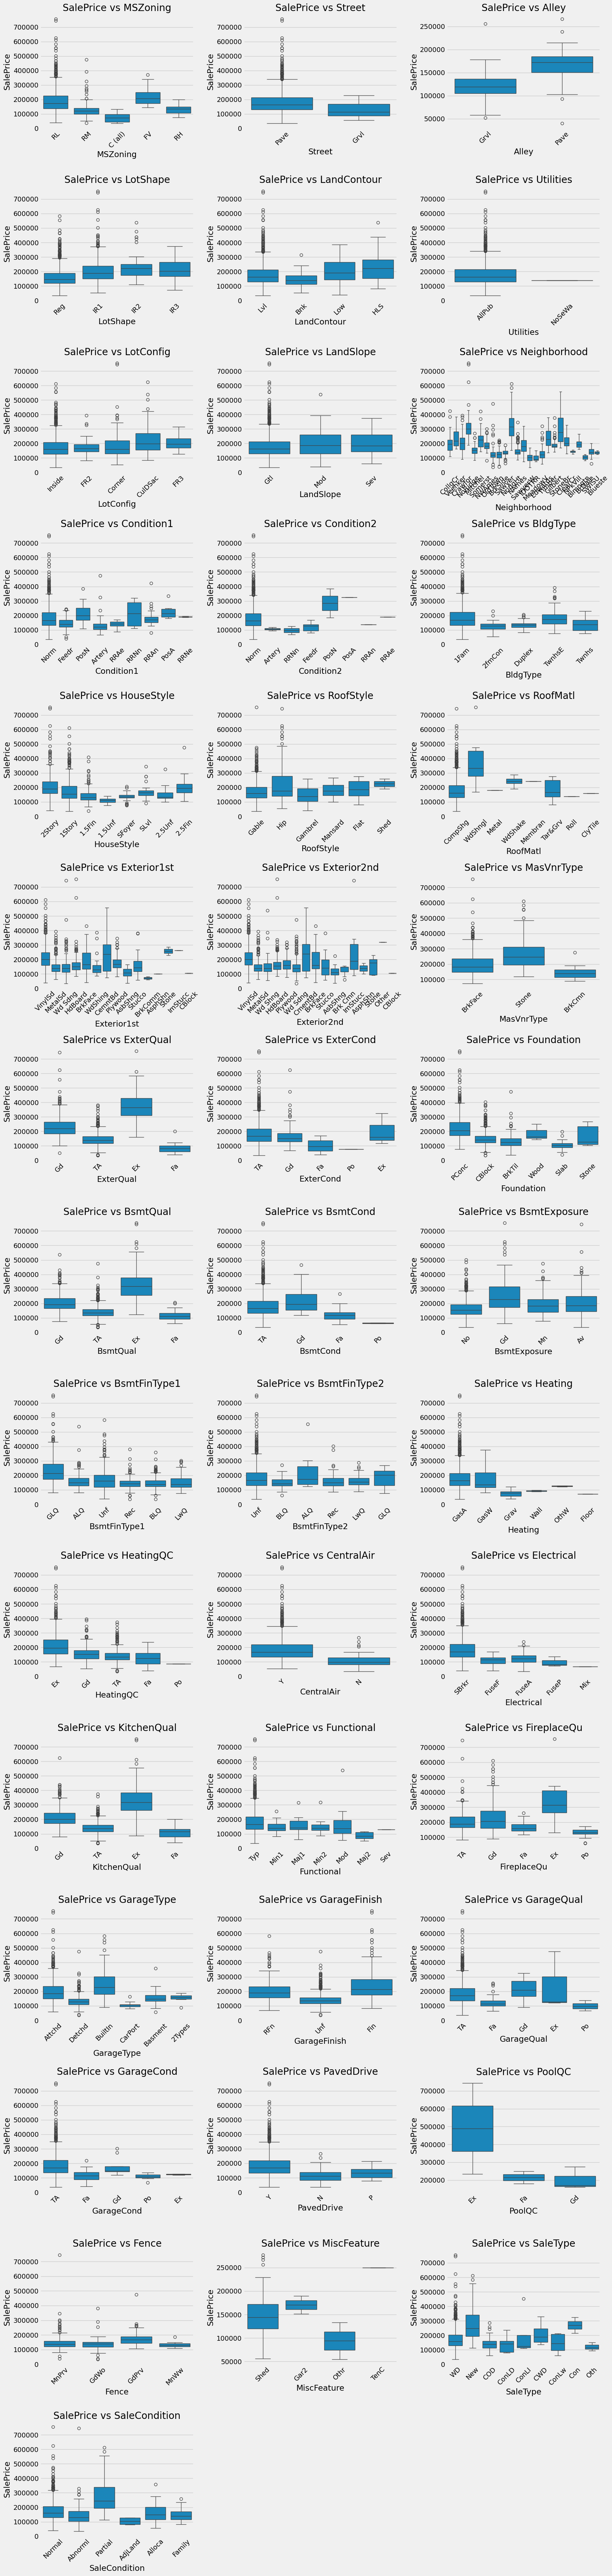

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = treino.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = (len(categorical_columns) // n_cols) + 1

plt.figure(figsize=(n_cols * 6, n_rows * 5))


for idx, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(x=col, y='SalePrice', data=treino)
    plt.xticks(rotation=45)
    plt.title(f'SalePrice vs {col}')
    plt.tight_layout()

plt.show()

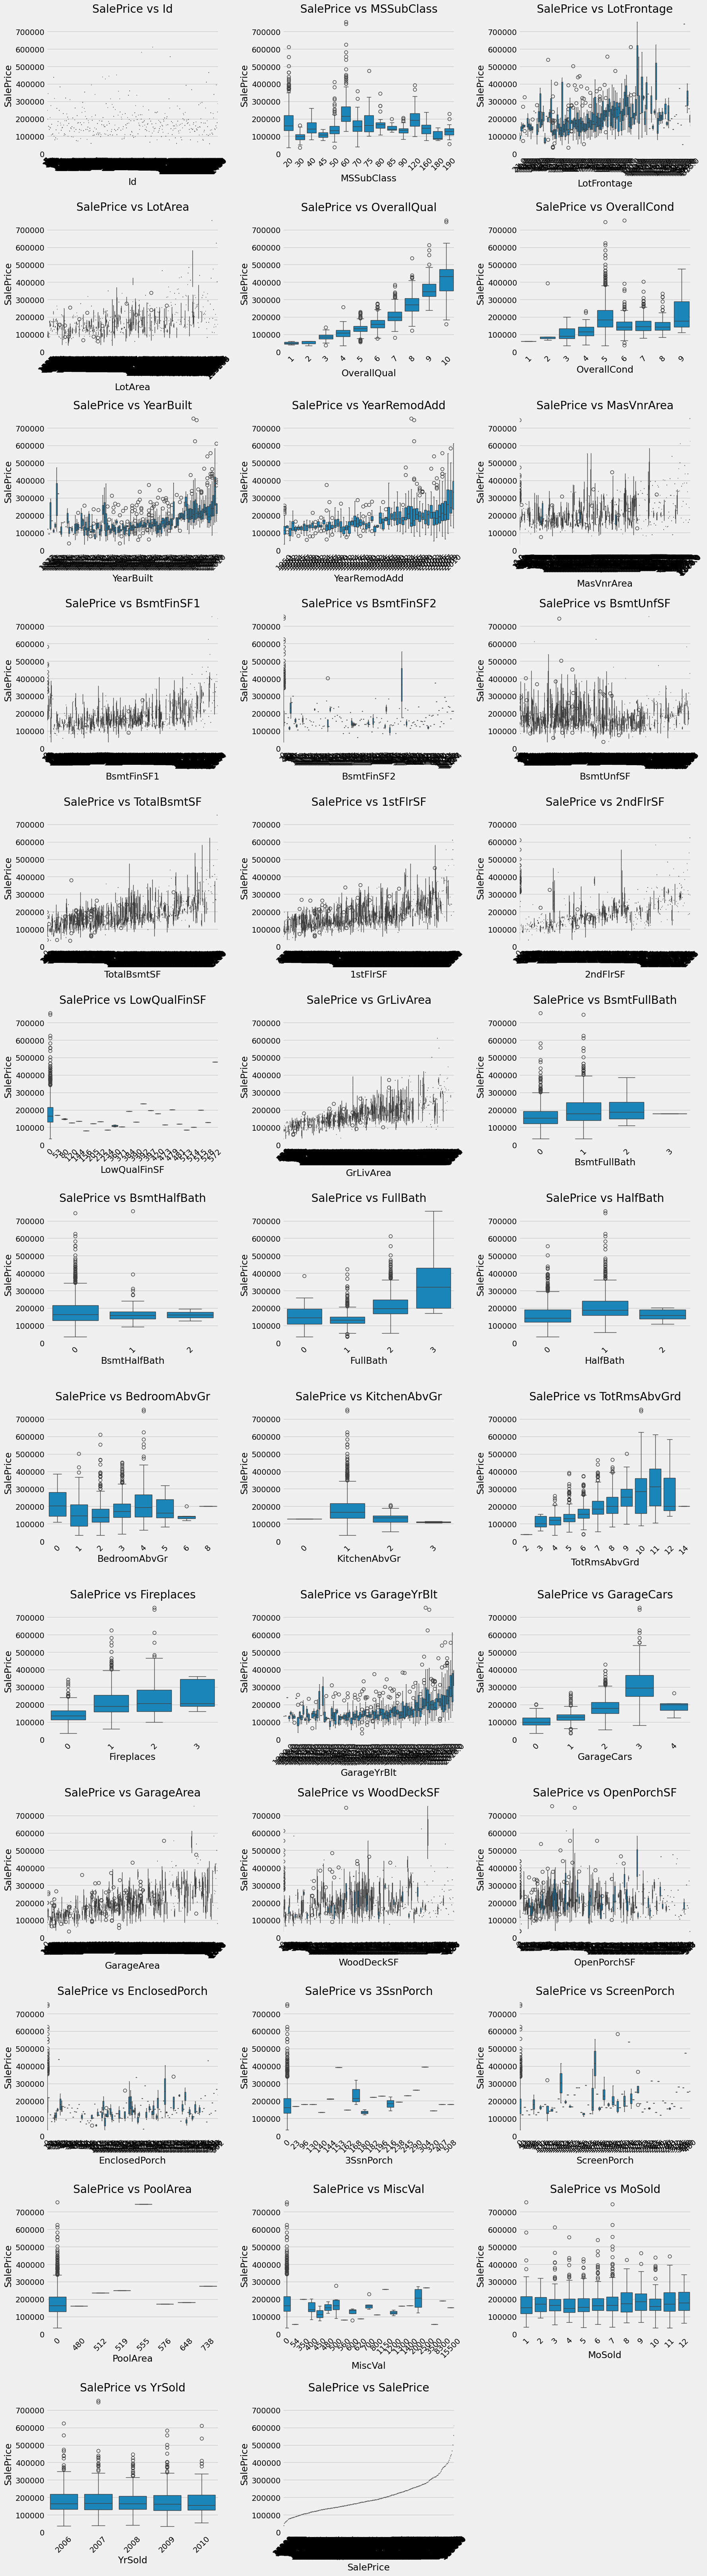

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


categorical_columns = treino.select_dtypes(exclude=['object']).columns

n_cols = 3
n_rows = (len(categorical_columns) // n_cols) + 1
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for idx, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(x=col, y='SalePrice', data=treino)
    plt.xticks(rotation=45)
    plt.title(f'SalePrice vs {col}')
    plt.tight_layout()

plt.show()

A mediana é geralmente mais robusta quando há outliers, o que parece ser o caso aqui (max = 313 parece muito alto comparado ao 75% = 80).

In [59]:
x['LotFrontage'] = x['LotFrontage'].fillna(x['LotFrontage'].mean())

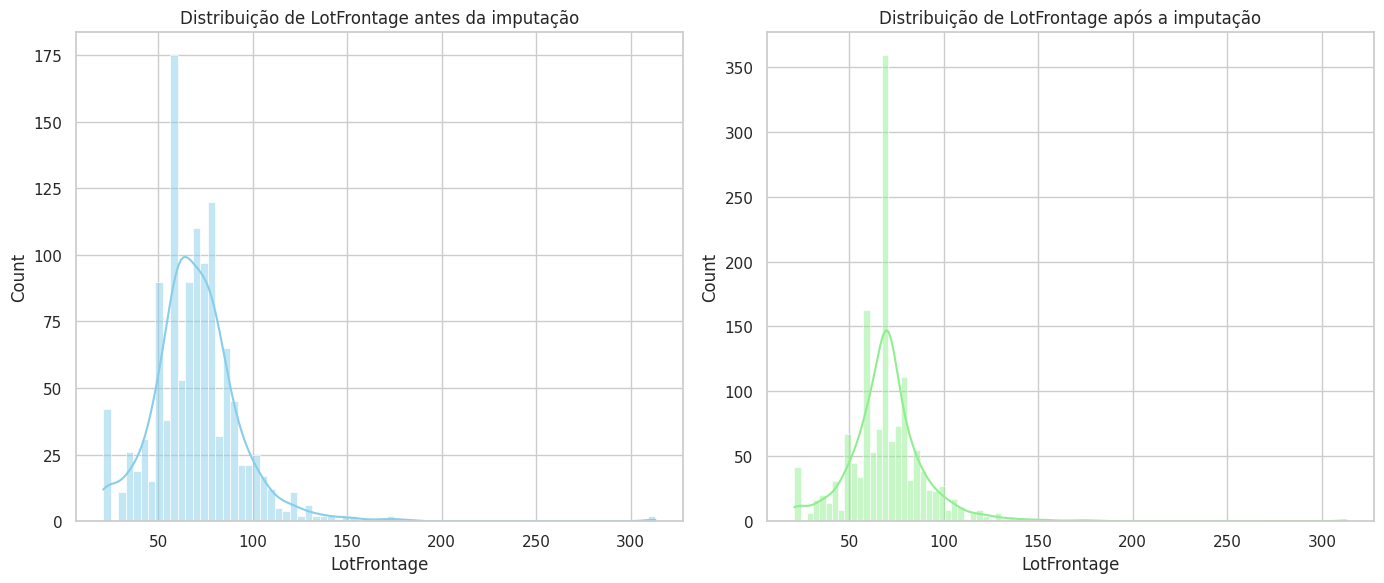

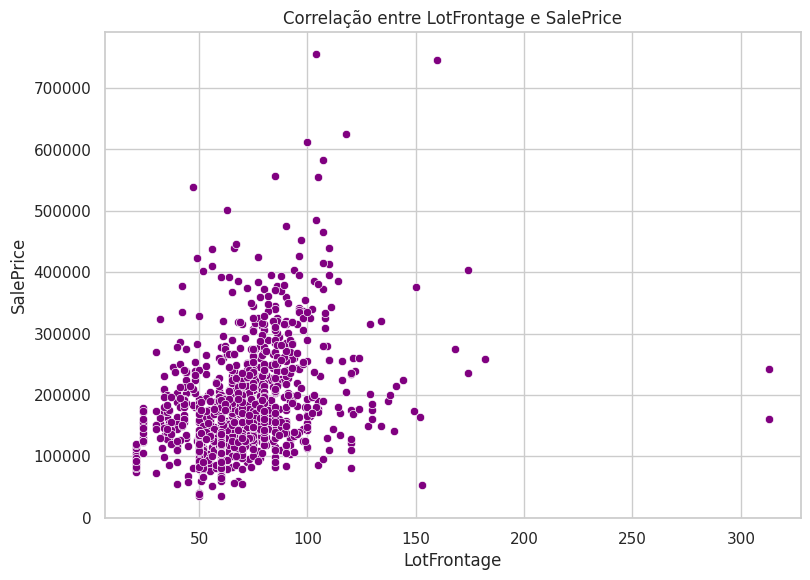

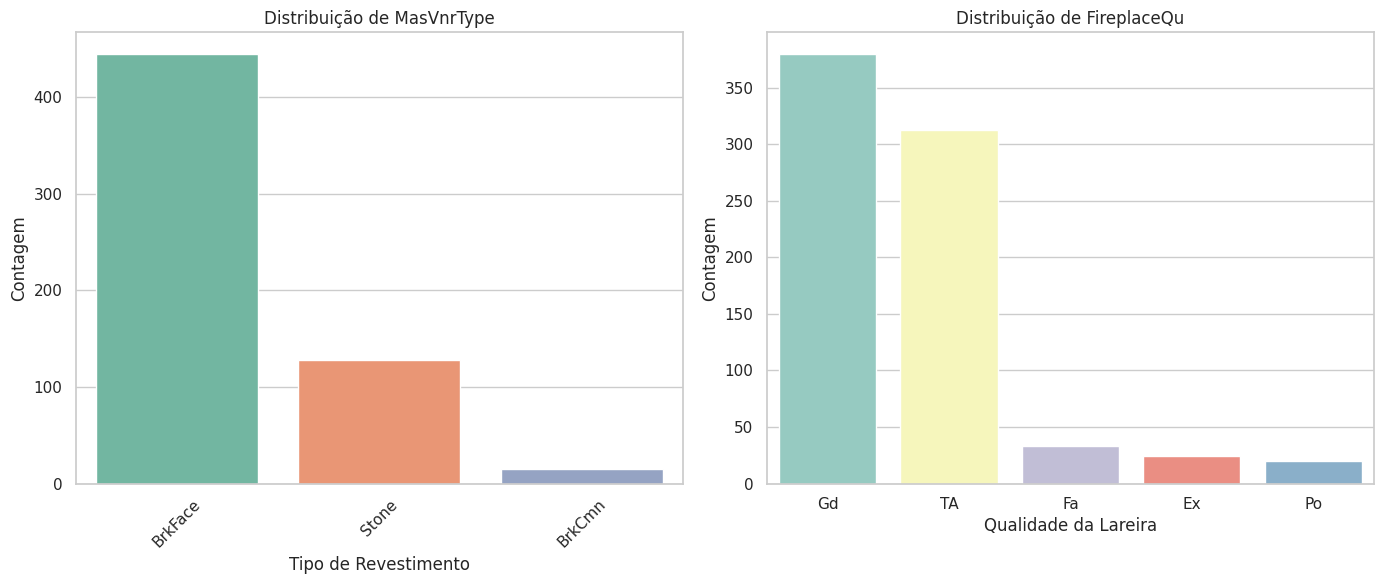

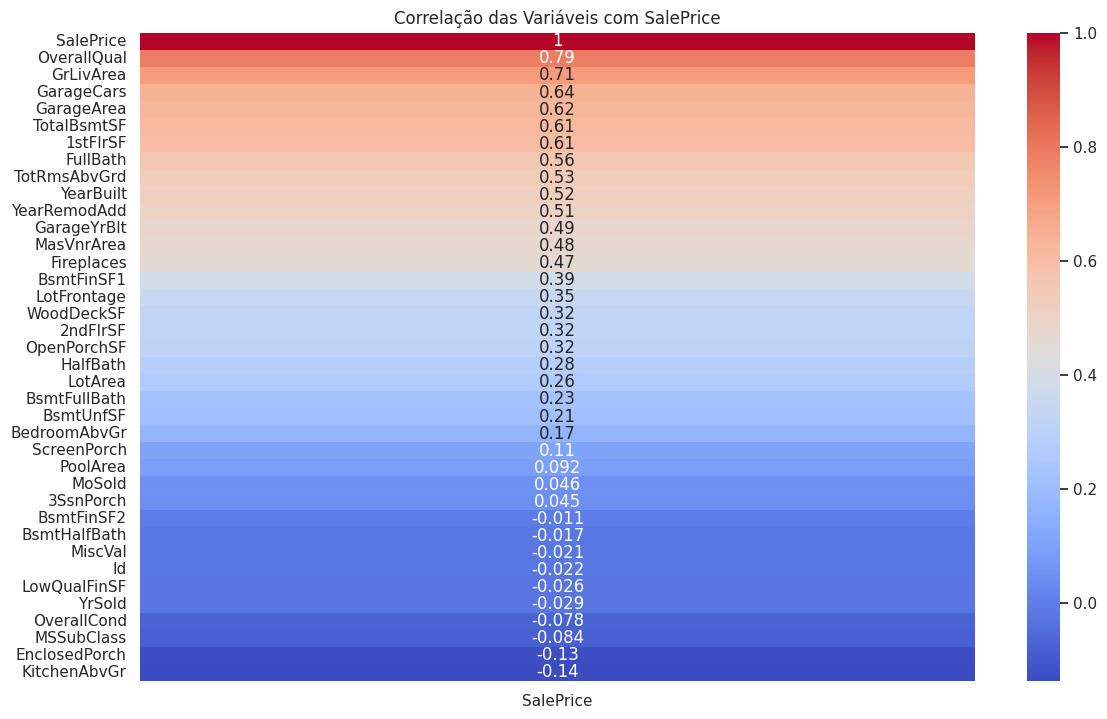

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(treino['LotFrontage'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribuição de LotFrontage antes da imputação')

sns.histplot(x['LotFrontage'], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title('Distribuição de LotFrontage após a imputação')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=treino, color='purple')
plt.title('Correlação entre LotFrontage e SalePrice')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='MasVnrType', data=treino, order=treino['MasVnrType'].value_counts().index, palette='Set2', ax=axs[0])
axs[0].set_title('Distribuição de MasVnrType')
axs[0].set_xlabel('Tipo de Revestimento')
axs[0].set_ylabel('Contagem')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x='FireplaceQu', data=treino, order=treino['FireplaceQu'].value_counts().index, palette='Set3', ax=axs[1])
axs[1].set_title('Distribuição de FireplaceQu')
axs[1].set_xlabel('Qualidade da Lareira')
axs[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


numeric_df = treino.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis com SalePrice')
plt.show()


## Campos do conjunto de dados:

## Descrição estatística das variáveis numéricas:

In [ ]:
for coluna in treino.select_dtypes(include=['number']).columns:
    print(f"Coluna: {coluna}")
    print(treino[coluna].describe())
    print("-" * 50)

Coluna: MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
--------------------------------------------------
Coluna: LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
--------------------------------------------------
Coluna: LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
--------------------------------------------------
Coluna: OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max     

## Tipagem dos dados:

In [ ]:
for coluna, tipo in treino.dtypes.items():
    print(f"{coluna}: {tipo}")

MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int64
Function

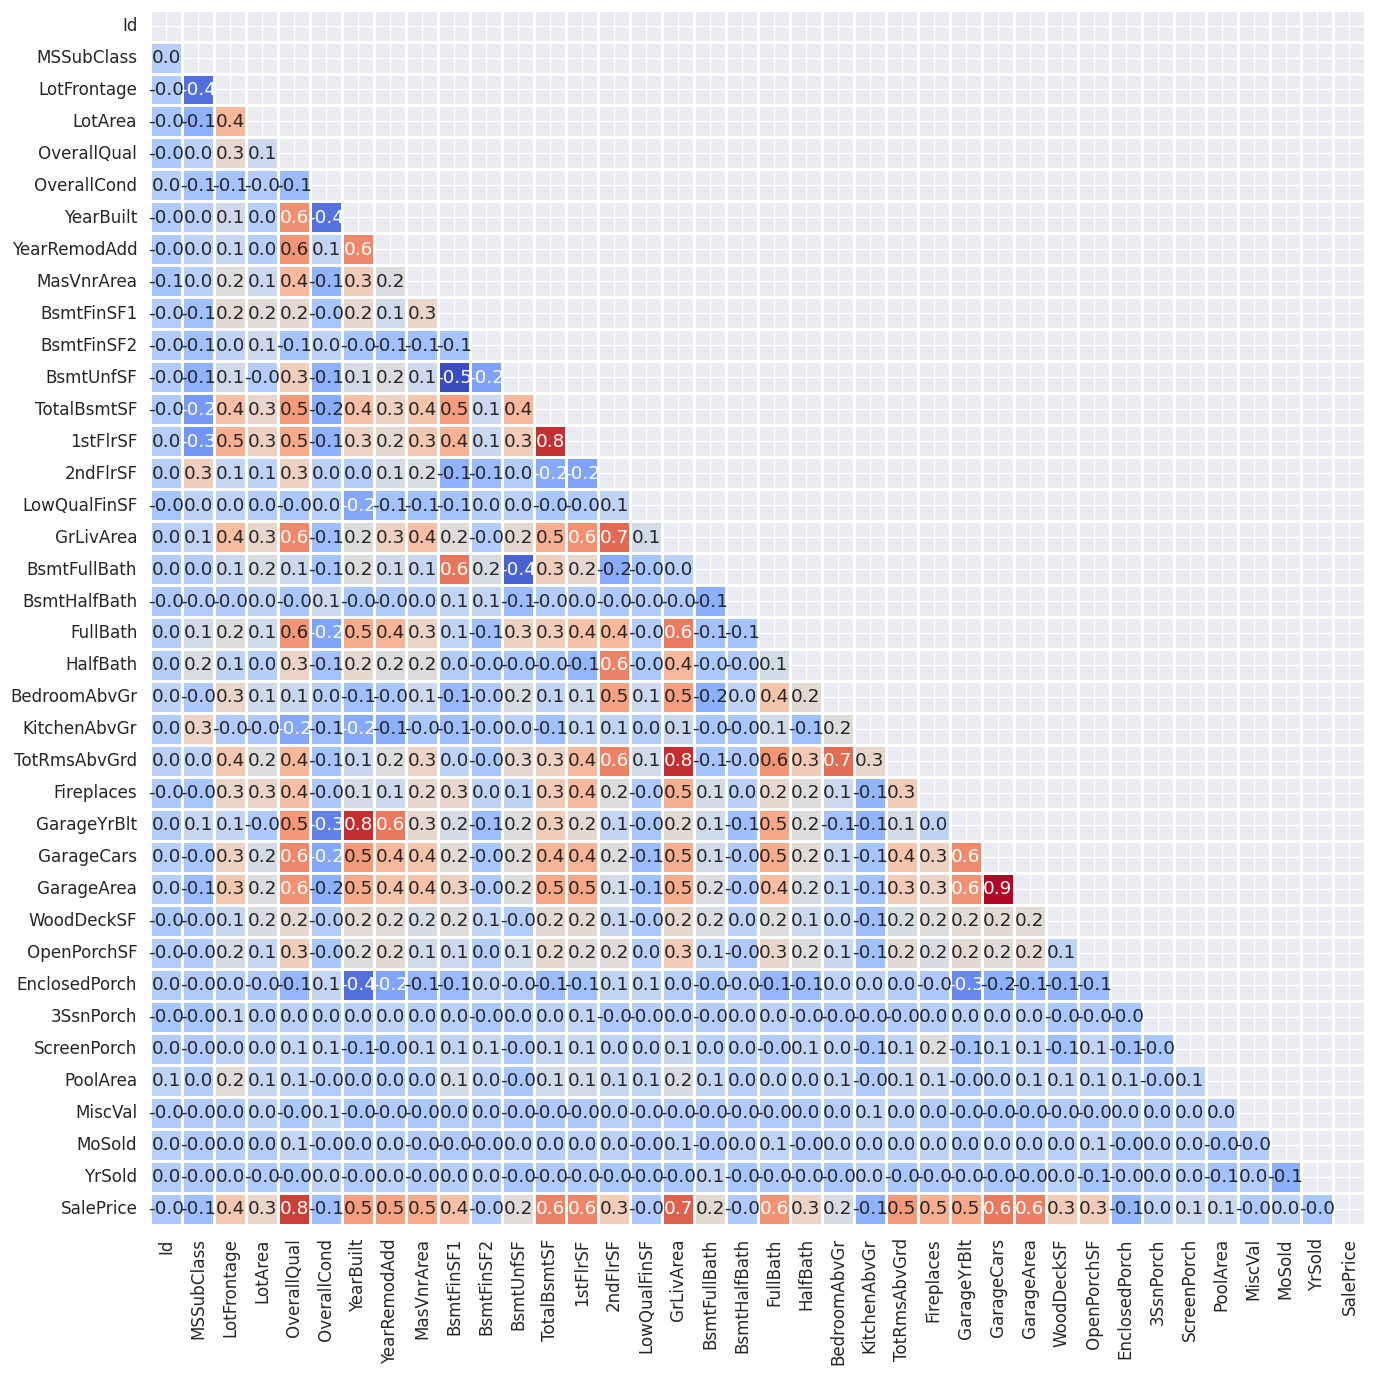

In [93]:
sns.set(font_scale=1.1)
correlation_train = treino.corr(numeric_only=True)
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [72]:
!pip install sklearn.preprocessing

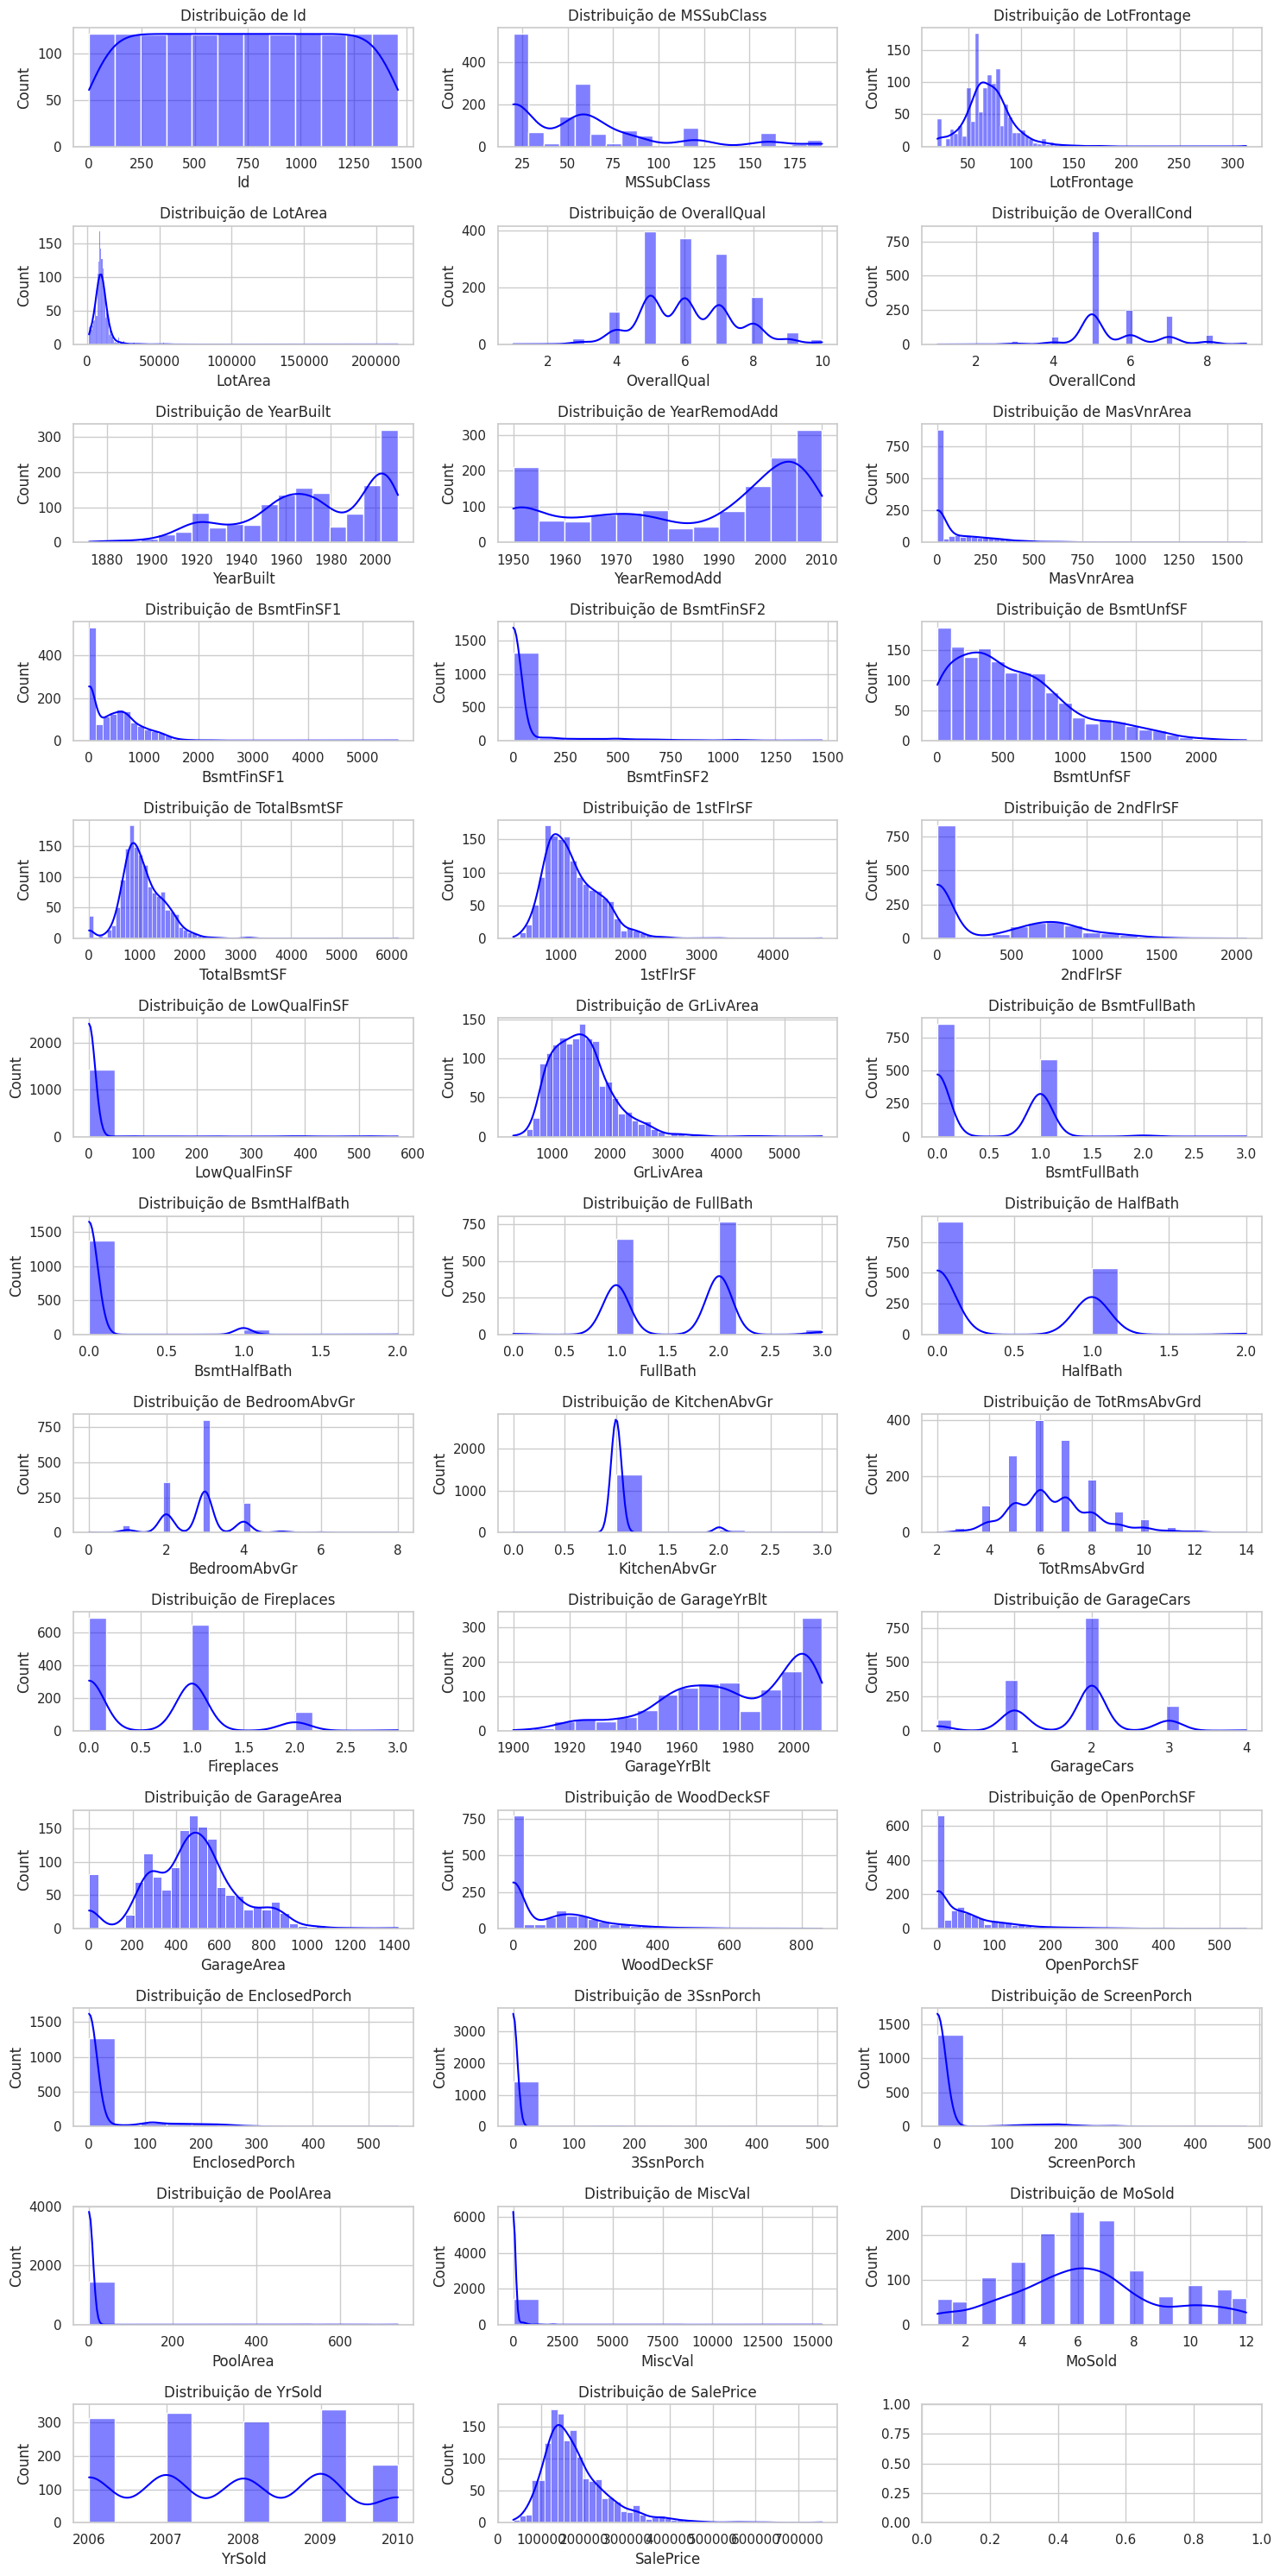

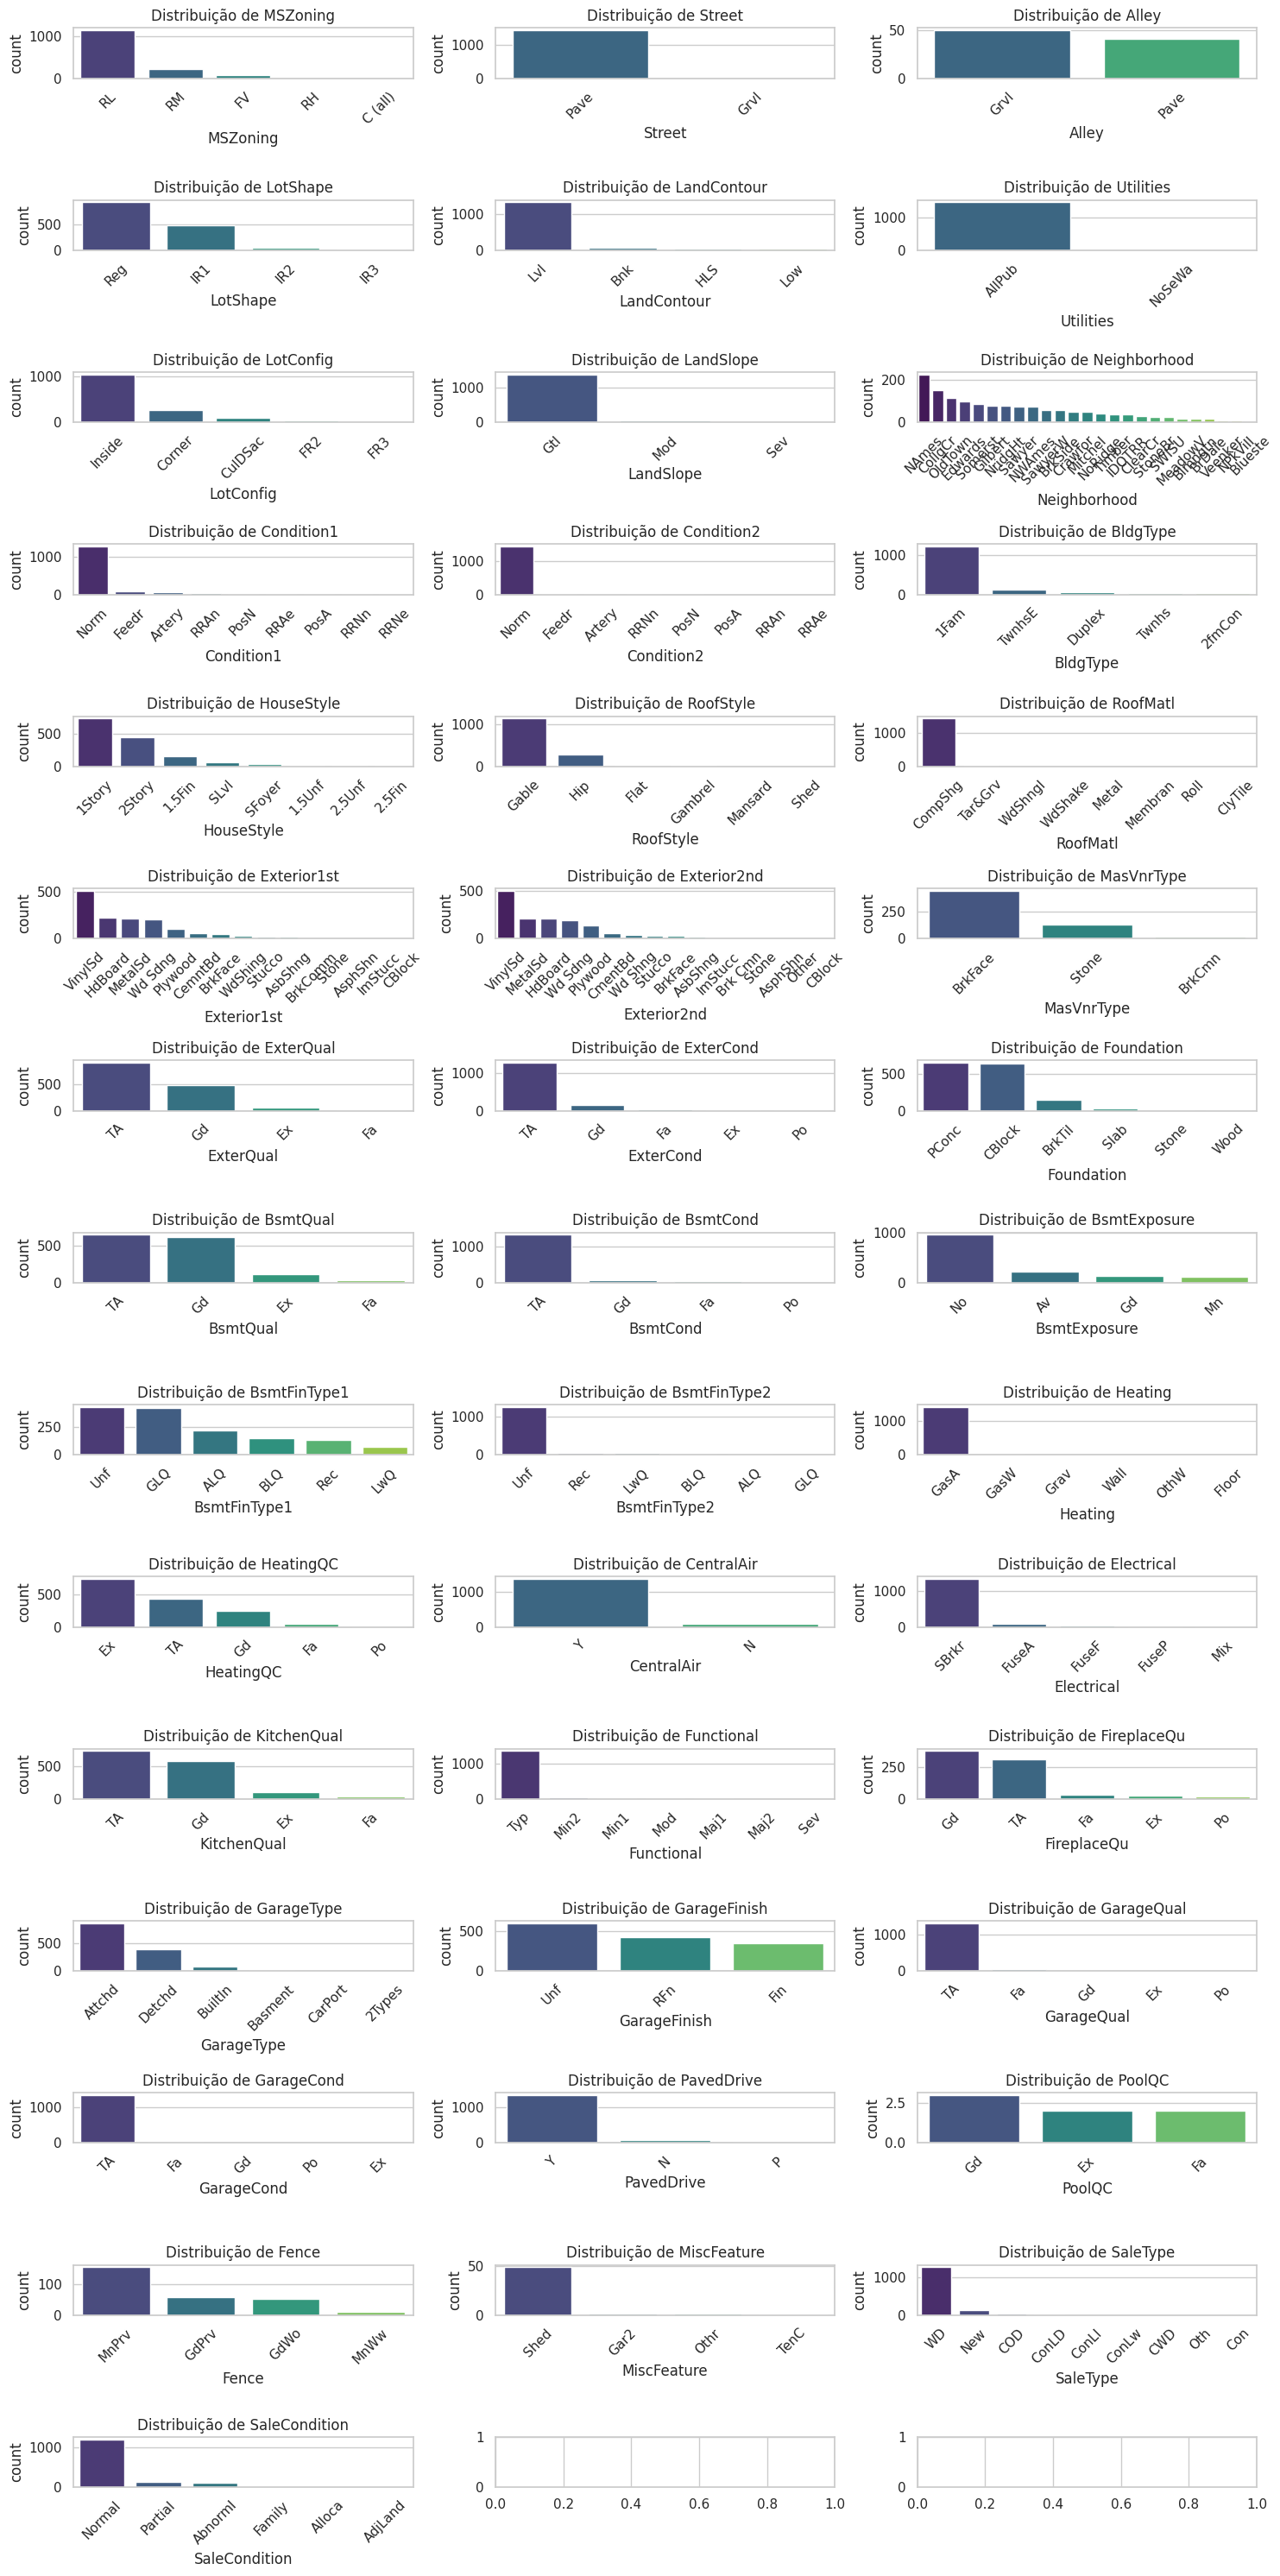

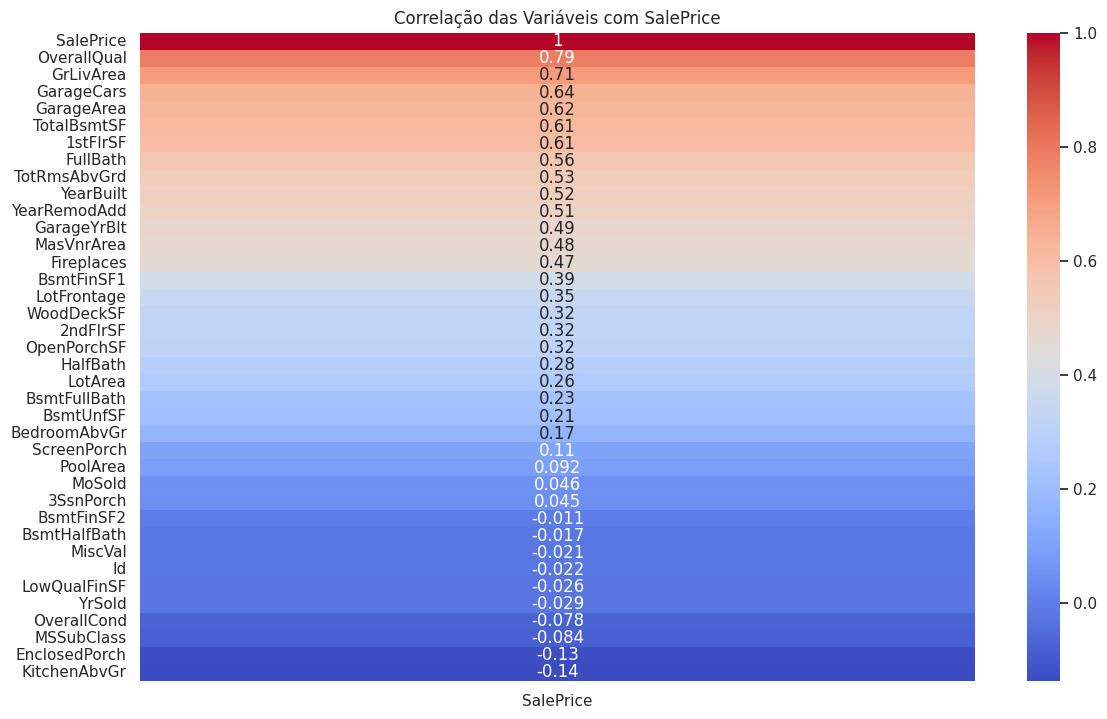

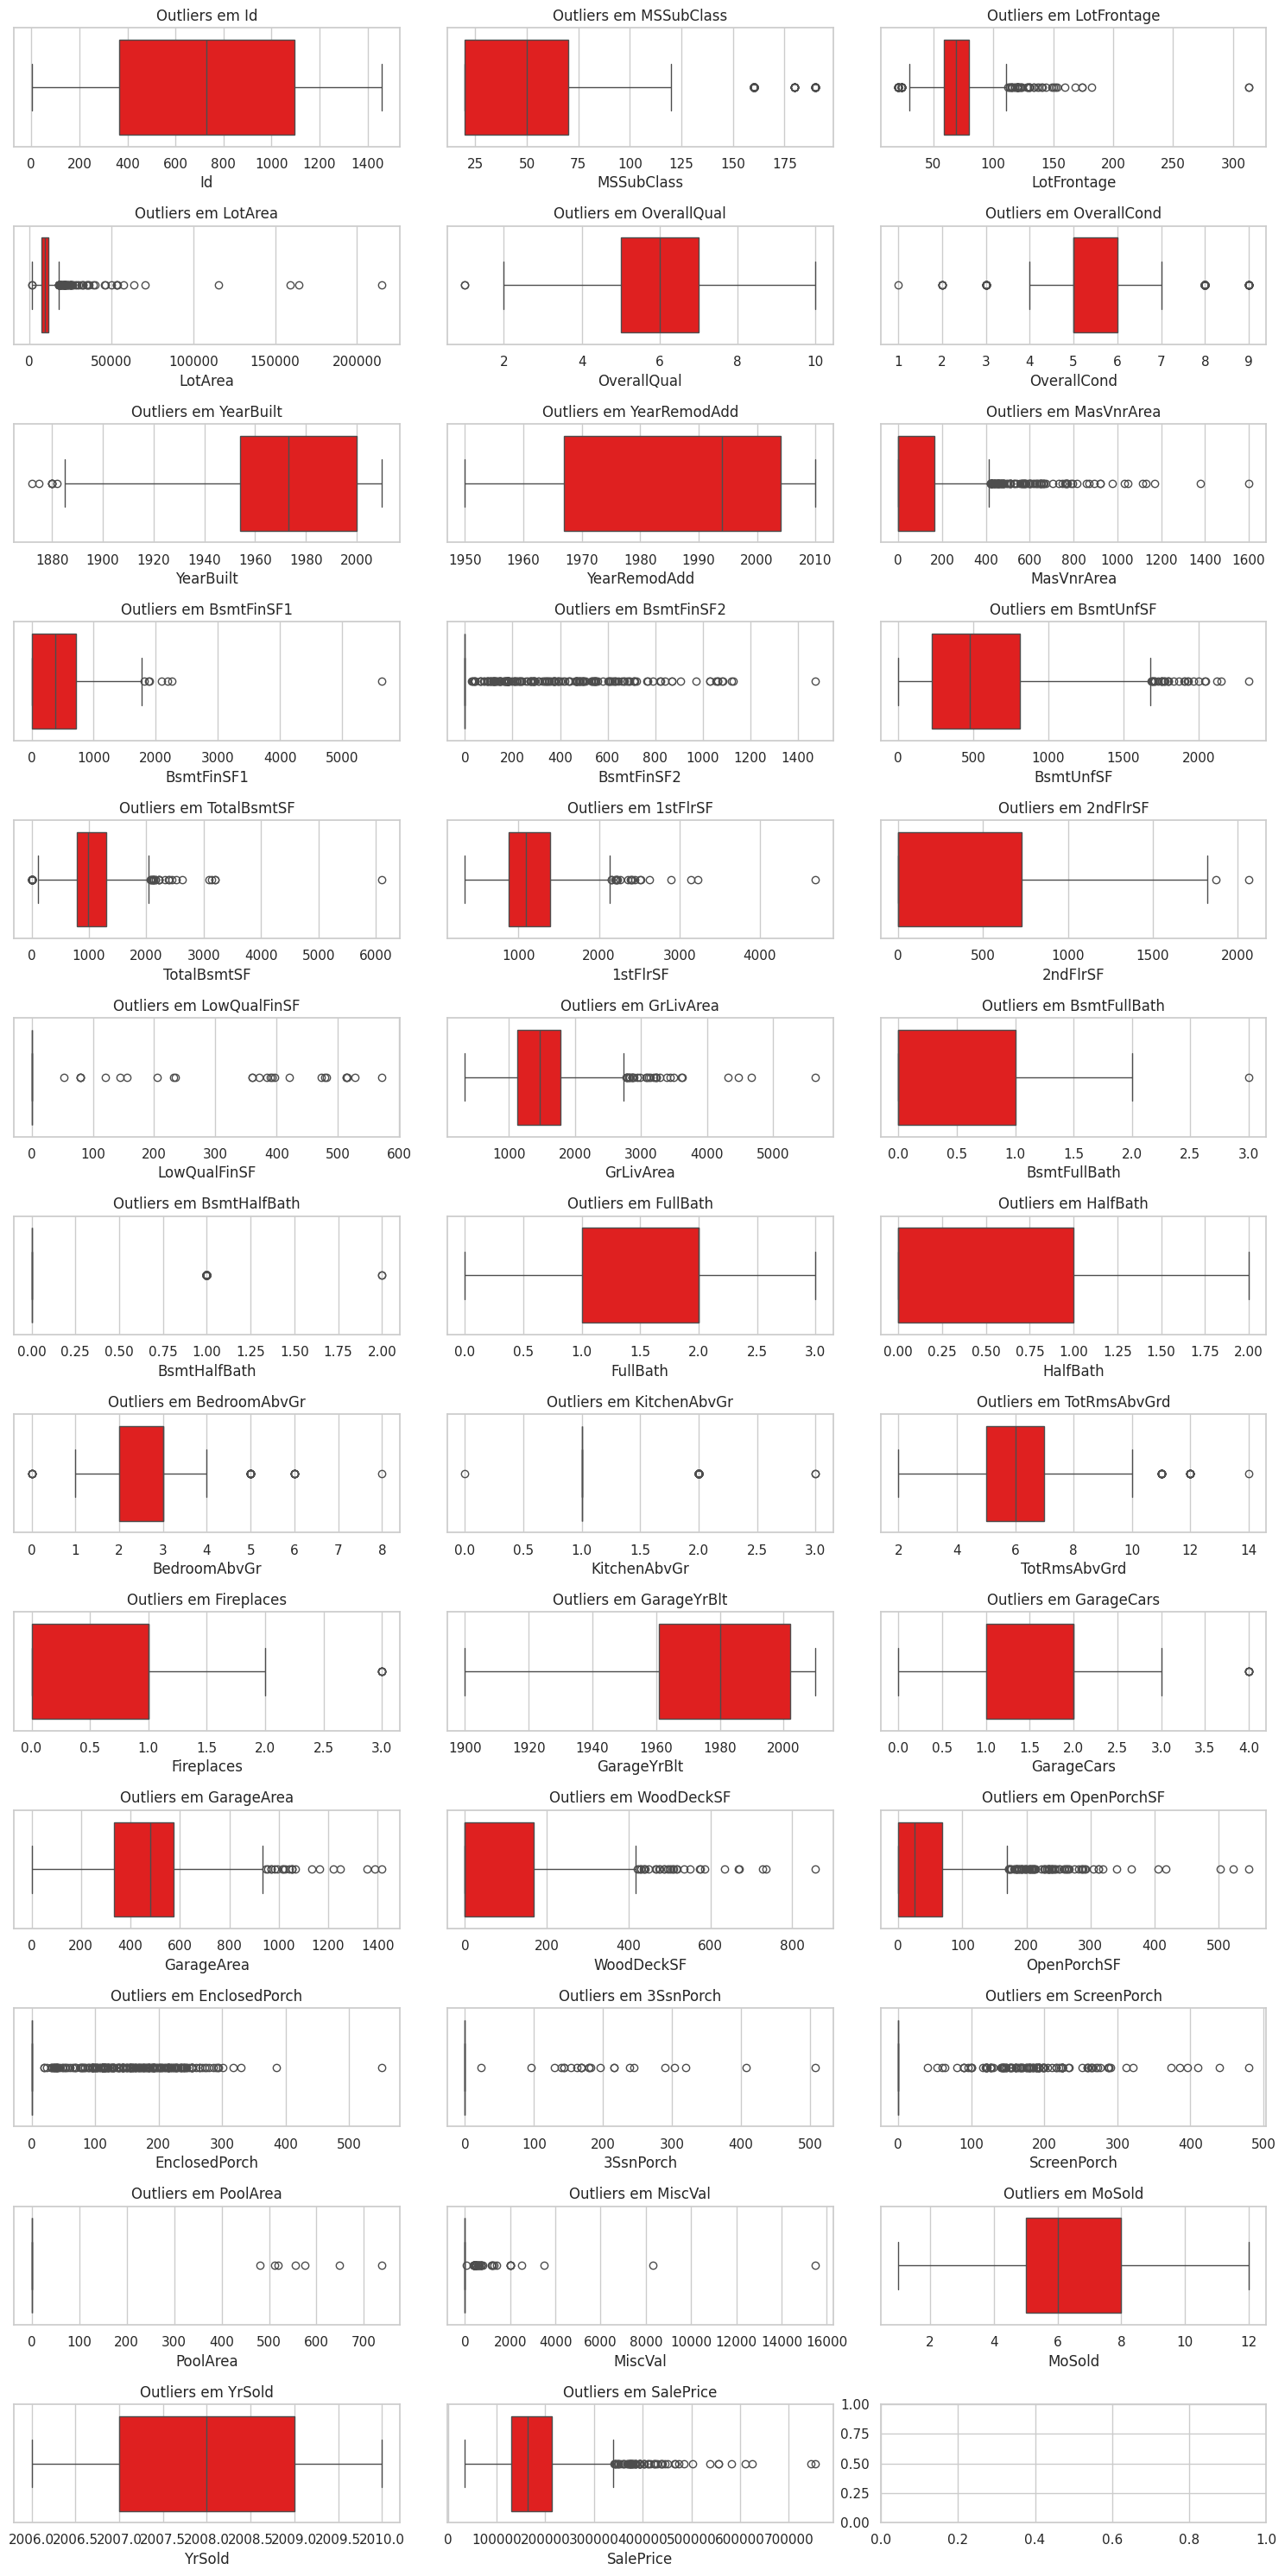

Linear Regression - RMSE: 30008.4136
Random Forest - RMSE: 30526.1646
Gradient Boosting - RMSE: 27870.2491
XGBoost - RMSE: 28309.7428


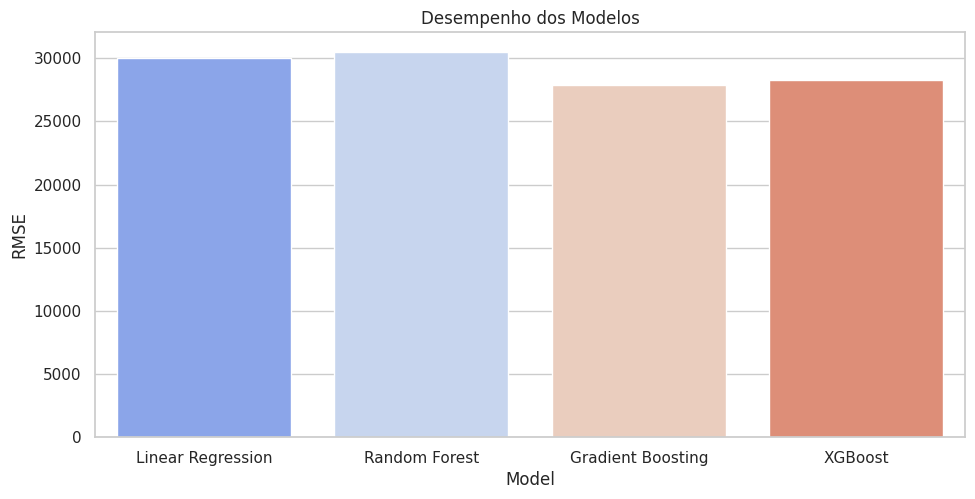

Modelagem concluída.


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


sns.set(style="whitegrid")

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')


numeric_columns = treino.select_dtypes(include=['number']).columns
fig, axs = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 30))
axs = axs.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(treino[col], kde=True, ax=axs[i], color='blue')
    axs[i].set_title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()


categorical_columns = treino.select_dtypes(include=['object']).columns
fig, axs = plt.subplots(len(categorical_columns) // 3 + 1, 3, figsize=(15, 30))
axs = axs.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=treino, order=treino[col].value_counts().index, ax=axs[i], palette='viridis')
    axs[i].set_title(f'Distribuição de {col}')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


correlation_matrix = treino.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis com SalePrice')
plt.show()


fig, axs = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 30))
axs = axs.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=treino[col], ax=axs[i], color='red')
    axs[i].set_title(f'Outliers em {col}')

plt.tight_layout()
plt.show()


correlated_features = correlation_matrix[correlation_matrix['SalePrice'].abs() > 0.7].index.tolist()
correlated_features.remove('SalePrice')
df_selected = treino.drop(columns=correlated_features)



X = df_selected.drop(columns=['SalePrice'])
y = df_selected['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('imputer', numeric_imputer),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f'{name} - RMSE: {rmse:.4f}')


results_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='coolwarm')
plt.title('Desempenho dos Modelos')
plt.ylabel('RMSE')
plt.show()

print("Modelagem concluída.")


In [88]:
!pip install --upgrade scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


## Abordagem mais genérica:

In [33]:

df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


train_path = "/content/train.csv"
test_path = "/content/test.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)


X = df_train.drop(columns=['SalePrice', 'Id'])
y = df_train['SalePrice']
X_test = df_test.drop(columns=['Id'])


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    return model, y_pred


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf, y_pred_rf = train_and_evaluate(rf, X_train, y_train, X_val, y_val)

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb, y_pred_gb = train_and_evaluate(gb, X_train, y_train, X_val, y_val)

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb, y_pred_xgb = train_and_evaluate(xgb, X_train, y_train, X_val, y_val)

lr = LinearRegression()
lr, y_pred_lr = train_and_evaluate(lr, X_train, y_train, X_val, y_val)


def create_submission(model, X_test, df_test, filename="submission.csv"):
    y_pred_submission = model.predict(X_test)
    submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": y_pred_submission
    })
    submission.to_csv(filename, index=False)
    print(f"Arquivo de submissão criado com sucesso: {filename}")


def plot_predictions(y_real, y_pred, title="Comparação entre Preços Reais e Previstos"):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_real, label="Distribuição real (train)", color="blue", fill=True)
    sns.kdeplot(y_pred, label="Distribuição prevista", color="red", fill=True)
    plt.legend()
    plt.title(title)
    plt.xlabel("SalePrice")
    plt.ylabel("Densidade")
    plt.show()


models_results = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "XGBoost": y_pred_xgb
}

results_list = []
for model_name, y_pred in models_results.items():
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)


    results_list.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2})


results_df = pd.DataFrame(results_list)


print(results_df)


               Model           MAE          RMSE        R²
0  Linear Regression  18287.846000  29475.524784  0.886731
1      Random Forest  17408.137192  28432.111903  0.894609
2  Gradient Boosting  16552.032347  26316.137302  0.909712
3            XGBoost  16046.147461  25633.549267  0.914335


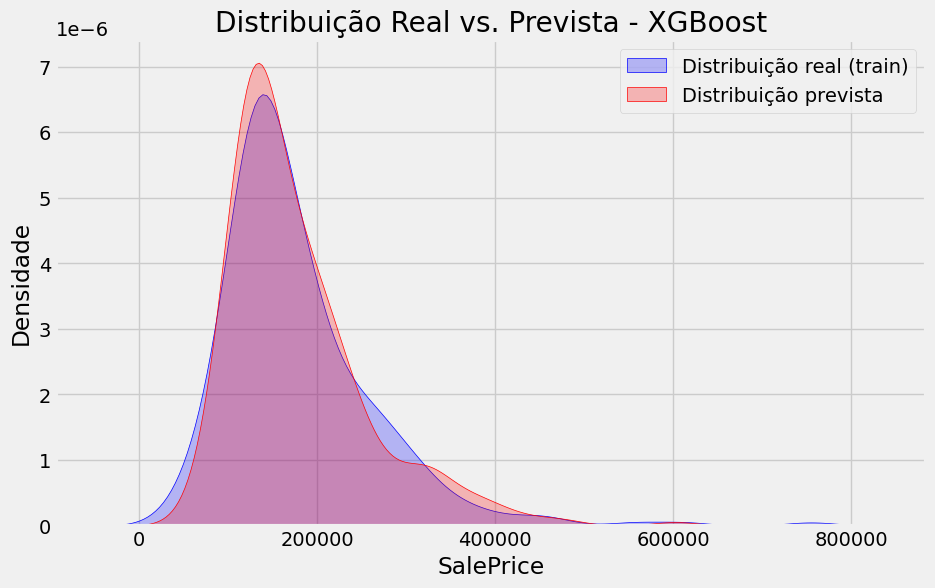

In [47]:
plot_predictions(y_val, y_pred_xgb, "Distribuição Real vs. Prevista - XGBoost")

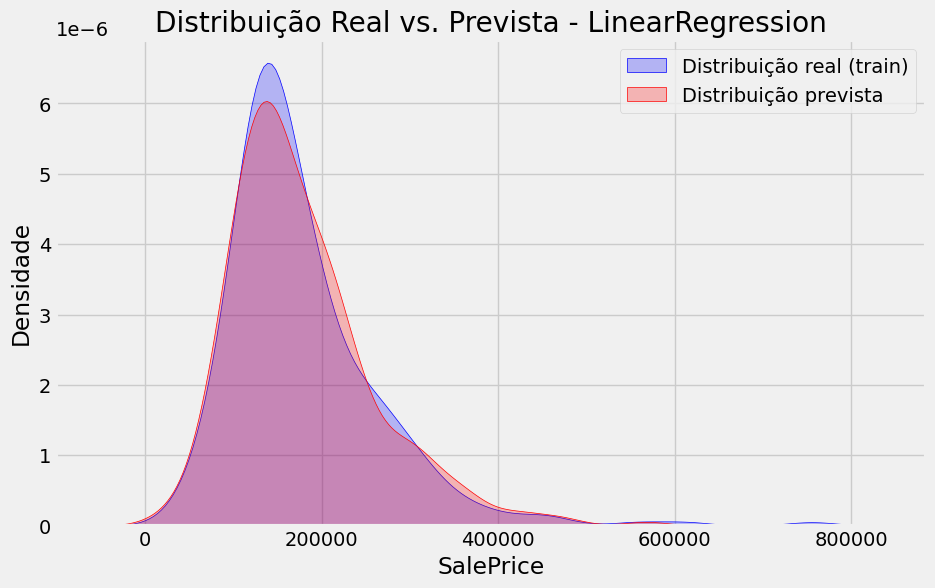

In [48]:
plot_predictions(y_val, y_pred_lr, "Distribuição Real vs. Prevista - LinearRegression")

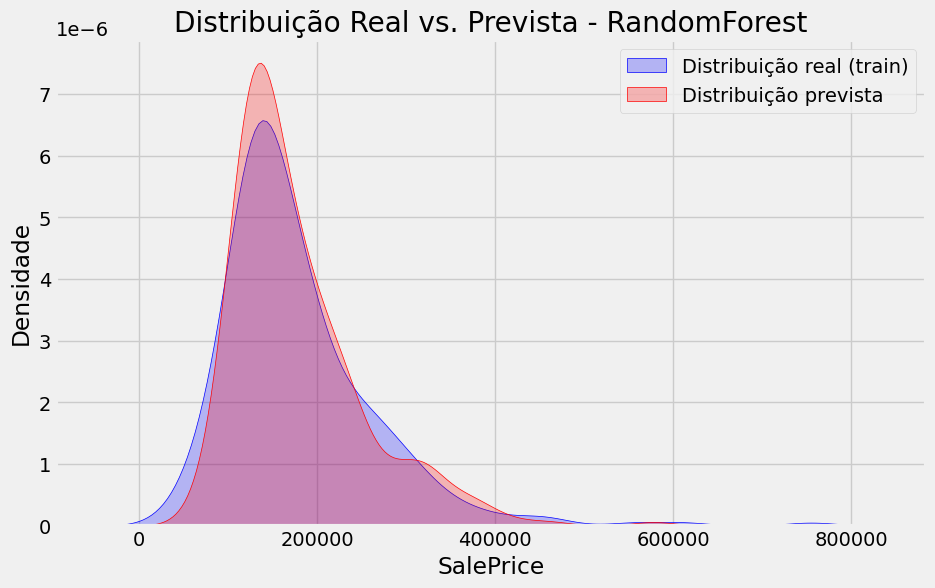

In [49]:
plot_predictions(y_val, y_pred_rf, "Distribuição Real vs. Prevista - RandomForest")

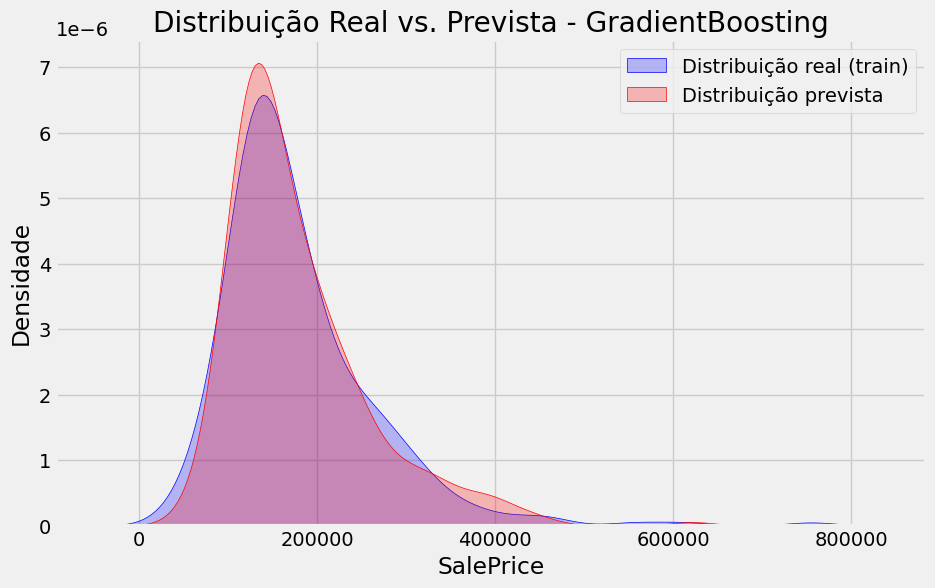

In [50]:
plot_predictions(y_val, y_pred_gb, "Distribuição Real vs. Prevista - GradientBoosting")

## Criar os arquivos de submissão:

In [43]:
create_submission(lr, X_test, df_test, "submission_linear_regression.csv")

Arquivo de submissão criado com sucesso: submission_linear_regression.csv


In [44]:
create_submission(xgb, X_test, df_test, "submission_xgb.csv")

Arquivo de submissão criado com sucesso: submission_xgb.csv


In [45]:
create_submission(gb, X_test, df_test, "submission_gb.csv")

Arquivo de submissão criado com sucesso: submission_gb.csv


In [46]:
create_submission(rf, X_test, df_test, "submission_rf.csv")

Arquivo de submissão criado com sucesso: submission_rf.csv


In [55]:
!pip install shap


In [56]:
import shap
import matplotlib.pyplot as plt

In [57]:
explainer = shap.Explainer(xgb)

shap_values = explainer(X_val)


## Explicação do Modelo com SHAP

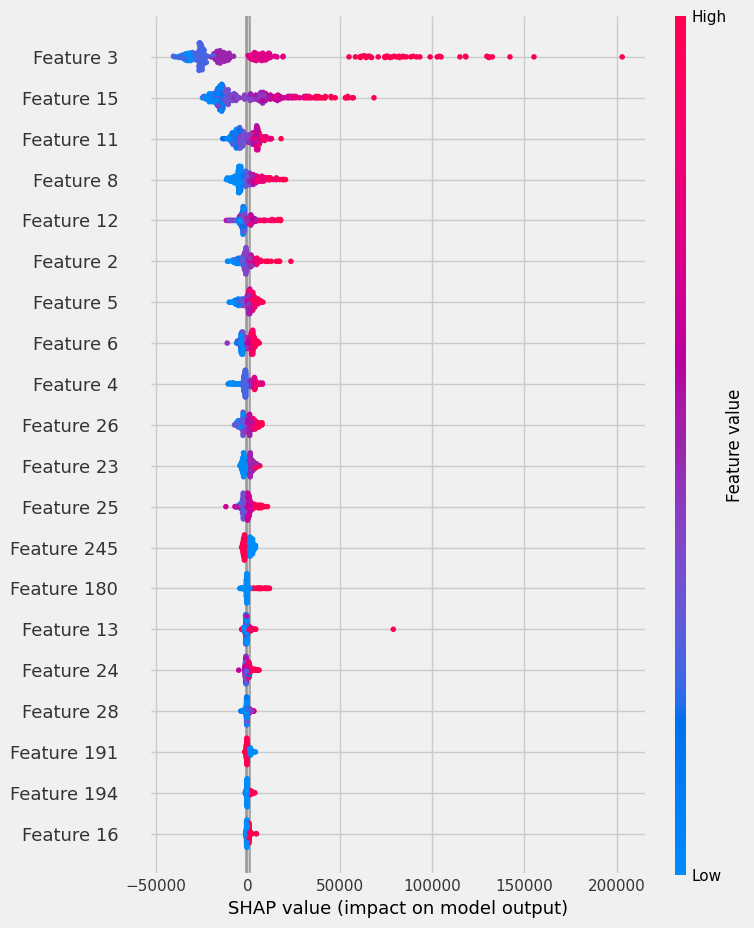

In [58]:
shap.summary_plot(shap_values, X_val)

In [60]:
feature_names = preprocessor.get_feature_names_out()
print(feature_names[3], feature_names[15],feature_names[11])


num__OverallQual num__GrLivArea num__TotalBsmtSF


As duas features mais importantes foram OverallQual (qualidade da construção) e GrLivArea (área habitável).

## Resultados da Submissão no Kaggle:

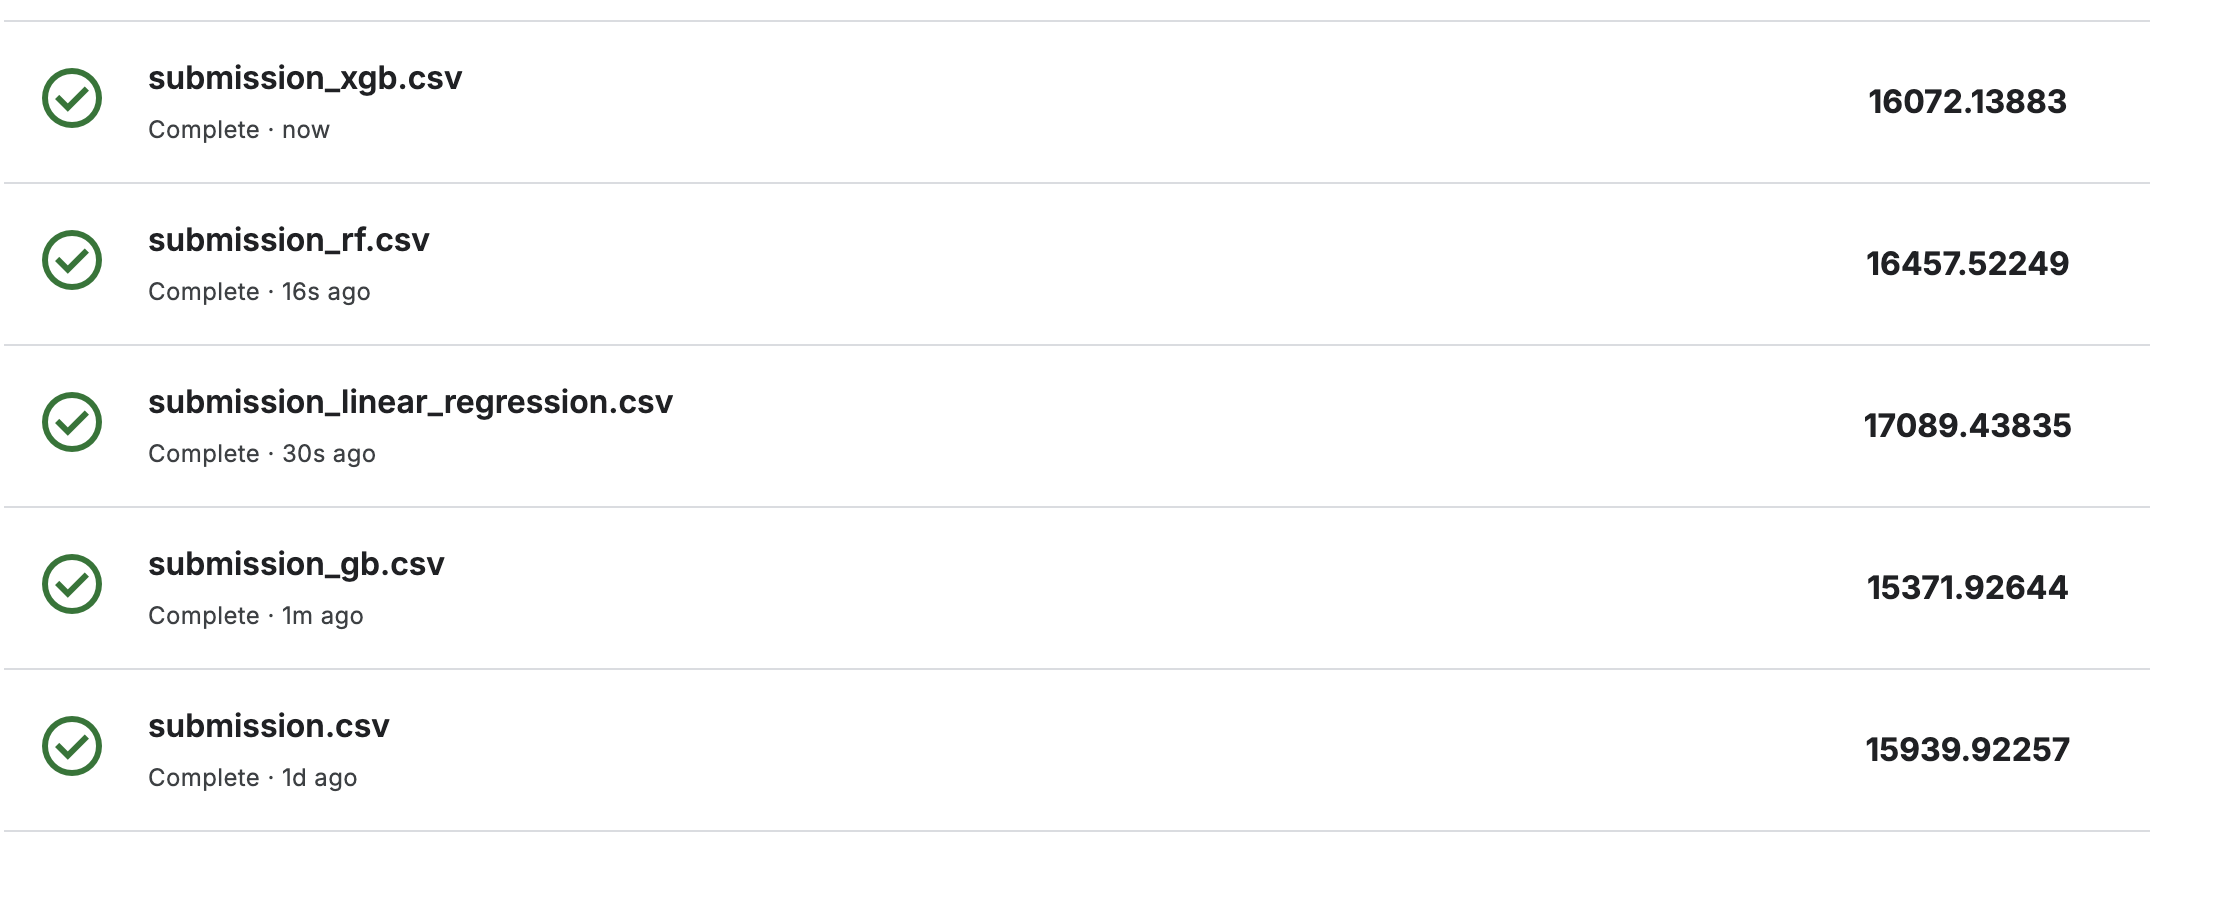